# Signal Pocessing
Acoustics studies the transmission, reception, production and effects of sound in it's environment. Sound is typically thought of as a wave that vibrates through a medium (e.g. air, liquid, etc.). This wave can be thought of as a compressional wave, a wave that vibrates parallel to the direction of propagation. These waves are characterized by its frequency, wavelength, amplitude, and speed. The study of acosutics is essential in a number of fields such as engineering, music, environmental science, communications, and heatlh. To explore acoustics and it's applications, we can utilize signal processing to enchance our understanding.

Signal processing uses a number of algorithms to enable acoustic analysis of sound. The use of signal processing has enabled acousticians to seperate, classify, and manipulate sounds. Signal processing algorithms and theory based on acoustics have changed the way we think about sound in a variety of concepts such as room, structural, biological, and underwater acoustics (just to name a few). Although there is a long history to signal processing and the theory towards applications in acoustics, in this notebook, we will go over some basic signal processing approaches starting with sampling theory, numberical representations, and wave propagation before going into examples of sound and visualizations. Through these techniques, we can build a better understanding for developing machine learning models and applying machine learning approaches toward acoustic research. This notebook is designed provide a brief introduction to understanding wave representations and how it relates to acoustics. To those that are interested in learning more about acoustics, we emplore you to explore more at the resource links found below. The topics covered in this notebook include:

### Topics 
1) Example Sound
2) 1D waves
3) Discrete and Continuous signals
4) Nyquist Sampling Therom
5) Fast Fourier Transforms
6) Spectrograms
7) Additional Signal Processing Technqiues

How does signal processing impact machine learning for acoustics you may ask. This is a very interesting question and one that is still being explored today. Machine learning is contigent on the amount of data points or the type of frequency, time, or other representation you use. In many cases this goes hand in hand. While this notebook does not dive directly into machine learning, please use this as a way to get familiar with a few different concepts.

Created by Ryan A. McCarthy

To learn more about acoustics or 
| Website | Description |
|:--------:|:--------:|
|  [Underwater Acoustics](https://dosits.org/)  |  Discovery of Sound in the Sea  |
|  [Digital Signals Theory](https://brianmcfee.net/dstbook-site/content/intro.html)  |  Digital Signals Theory   | 
| [IEEE](https://signalprocessingsociety.org/our-story/signal-processing-101) | Signal Processing 101|

### Import packages
For this notebook please run the below cell to load in the basic packages you will need.

In [2]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import librosa 
import librosa.display
import IPython.display as ipd

from glob import glob

# Example Sound
Let's start by looking loading in, listening, and analyzing an acoustic sound. Below is a sound clip of a trumpet player that is available through the python package [librosa](https://librosa.org/doc/latest/index.html#). 

In [13]:
filename = librosa.ex('trumpet')
y, sr = librosa.load(filename)

The output of the acoustic sound provides the audio time series and the sampling rate. The time series represents the amplitude of sound at each time step where the time step (t) is dictated by the equation below:
$$
    t(i) = \frac{1}{S},
$$
where S is the sample rate. The sample rate is typically in samples per second (unless otherwise indicated), therefore, we can think of the sample rate as the number of points in the audio signal per one-second of audio (e.g. if S=180000, one-second is 180000 samples). Let's take a listen and look at the visual time series of the trumpeter below.  

In [24]:
# Find audio file
audio_files = glob('../input/ravdess-emotional-speech-audio/*/*.wav')

# Play audio file
ipd.Audio(data=y,rate = sr)

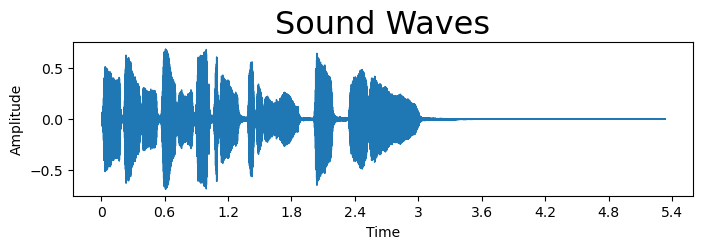

In [26]:
plt.figure(figsize = (8, 2))
librosa.display.waveshow(y = y, sr = sr);
plt.title("Sound Waves", fontsize = 23);
plt.ylabel('Amplitude')
plt.show()

Something we can notice in the above sound wave is the amplitude values. The higher the absolute amplitude, the louder the sound. We can also notice that the amplitude can be positive and negative, but why is that? 

This is because of how we represent a sound wave, we can think of sounds as sinusoidal functions that oscillate about a baseline. The higher a baseline, the louder the ambient background environment. This representation is helpful for understanding interferance patterns between waves when they interact. Let's explore what a sinusodial wave looks like below.

## 1D Waves
The easiest representation for a wave (or sound), y, is through a 1D oscillatory sinusoidal function over time, t, which is represented as:

$$
    y(t)=A \sin(2\pi ft + \phi)
$$
where A the maximum amplitude of the wave from the highest point (the crest) and the lowest point (trough) of one wave cycle, f is the frequency (in hertz), and $\phi$ is the phase shift. Changing the amplitude impacts the height of the signal while changing the frequency changes the rate at which a signal oscillates over time. When we change the phase, we are shifting the signal to the right or the left (in a 1D case) along the x-axis. This is seen below where we first change the phase of the sine wave and then play with the frequency and amplitude of both the sine and cosine wave.

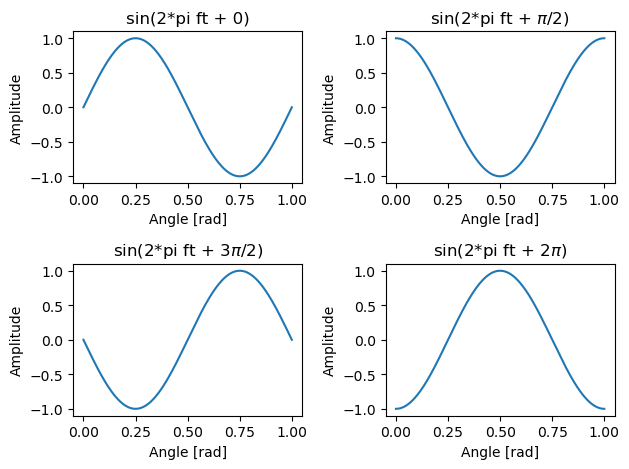

In [32]:
x = np.linspace(0, 1, 201)
steps = np.arange(0,2*np.pi,np.pi/2)
names = ['0',r'$\pi/2$',r'$3\pi/2$',r'$2\pi$']
for en,phi in enumerate(steps):
    plt.subplot(2, 2, en+1)
    plt.plot(x, np.sin(2*np.pi*x + phi))
    plt.xlabel('Angle [rad]')
    plt.ylabel('Amplitude')
    plt.axis('tight')
    plt.title(f'sin(2*pi ft + {names[en]})')
plt.tight_layout()
plt.show()

When the phase is $\pi/2$ (or $90^o$), we get a cosine wave. Whereas when the sine wave has a phase of $3\pi/2$ (or $270^o$), the sine wave is completely reflected. Let's now look at what happens when we play with the frequency and amplitude of the signals.

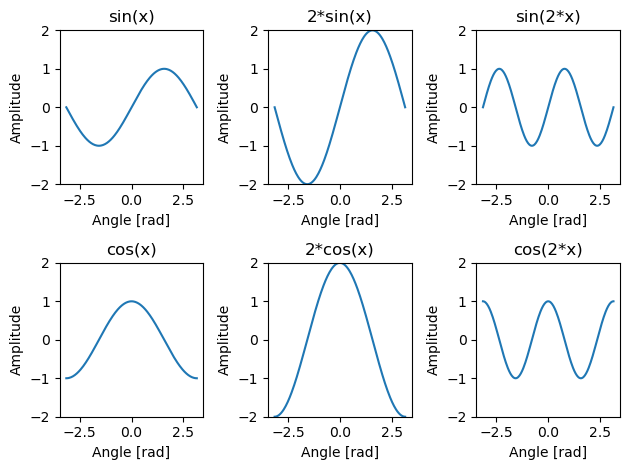

In [36]:
# Create x data
x = np.linspace(-np.pi, np.pi, 201)

# Plot sine and cosine and variations
plt.subplot(2, 3, 1)
plt.plot(x, np.sin(x))
plt.xlabel('Angle [rad]')
plt.ylabel('Amplitude')
plt.axis('tight')
plt.ylim(-2,2)
plt.title('sin(x)')

plt.subplot(2,3, 4)
plt.plot(x, np.cos(x))
plt.xlabel('Angle [rad]')
plt.ylabel('Amplitude')
plt.axis('tight')
plt.ylim(-2,2)
plt.title('cos(x)')

plt.subplot(2,3, 2)
plt.plot(x, 2*np.sin(x))
plt.xlabel('Angle [rad]')
plt.ylabel('Amplitude')
plt.axis('tight')
plt.ylim(-2,2)
plt.title('2*sin(x)')

plt.subplot(2,3, 5)
plt.plot(x, 2*np.cos(x))
plt.xlabel('Angle [rad]')
plt.ylabel('Amplitude')
plt.axis('tight')
plt.ylim(-2,2)
plt.title('2*cos(x)')

# change the frequency
plt.subplot(2, 3, 3)
plt.plot(x, np.sin(x*2))
plt.xlabel('Angle [rad]')
plt.ylabel('Amplitude')
plt.axis('tight')
plt.ylim(-2,2)
plt.title('sin(2*x)')

plt.subplot(2,3, 6)
plt.plot(x, np.cos(x*2))
plt.xlabel('Angle [rad]')
plt.ylabel('Amplitude')
plt.axis('tight')
plt.ylim(-2,2)
plt.title('cos(2*x)')

plt.tight_layout()
plt.show()

When we adjust the amplitude of the wave by 2, the overall amplitude doubles. Similarly, when we double the frequency of the signal, the number of oscillations doubles. This holds true as we continue to increase the frequency or increase the amplitude. Next we will look at how these waves are derived.

### Euler's Formula
One of the most useful and convient representations of a sinusoidal wave is throug the Euler formula which is defined as:
$$
    e^{i\theta} = \cos (\theta) + i \sin (\theta)
$$
where $e$ is the natural logarithm, $i = \sqrt(-1)$, and $\theta$ is any real number. The benefit of this equation is it allows signals to be represented as complex numbers which allows us to analyze components of a signal (i.e. phase angle, frequency, and amplitude). If we remember our trigonometry (sorry not covered in these notebooks), we can derive trigonometric identities such as:
$$
\cos(\theta) = \frac{e^{i\theta} + e^{-i\theta}}{2}
$$
$$
\sin(\theta) = \frac{e^{i\theta} - e^{-i\theta}}{2i}
$$
We'll leave the proofs for the reader to explore but something that is useful out of these equations is how we can rewrite our equations in terms of summations of natural logarithms seen below. This concept will come in handy later when we start thinking about frequency representations of signals (i.e. Fast Fourier Transforms).

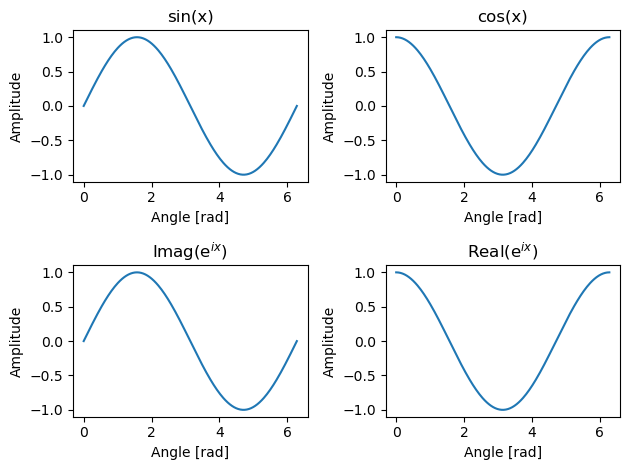

In [28]:
x = np.linspace(0, 2*np.pi, 201)
plt.subplot(2, 2, 1)
plt.plot(x, np.sin(x))
plt.xlabel('Angle [rad]')
plt.ylabel('Amplitude')
plt.axis('tight')
plt.title('sin(x)')

plt.subplot(2,2, 2)
plt.plot(x, np.cos(x))
plt.xlabel('Angle [rad]')
plt.ylabel('Amplitude')
plt.axis('tight')
plt.title('cos(x)')

plt.subplot(2, 2, 3)
plt.plot(x,np.imag( (np.exp(1j*x) - np.exp(-1j*x))/2))
plt.xlabel('Angle [rad]')
plt.ylabel('Amplitude')
plt.axis('tight')
plt.title('Imag(e$^{ix}$)')

plt.subplot(2,2, 4)
plt.plot(x, np.real( (np.exp(1j*x) + np.exp(-1j*x))/2))
plt.xlabel('Angle [rad]')
plt.ylabel('Amplitude')
plt.axis('tight')
plt.title('Real(e$^{ix}$)')

plt.tight_layout()
plt.show()

### Angular relationship
Taking the above a little further, we can use Euler's formula to show the relationship between sine and cosine in a complex plane shown as a unit circle. The complex plane ranges from 0 to $2\pi$ or (0 to 360 degrees) moving counterclockwise. If we were to adjust the amplitde of our wave, our radius of the unit circle would adjust proportionally. At each point along the unit circle, we can see how sine and cosine co-vary as a function of time. For further discussion/reading, we suggest taking a look at [wolfram](https://mathworld.wolfram.com/UnitCircle.html) description of the unit circle. 

C:\Users\ryan-\AppData\Local\Temp\ipykernel_25948\1339049205.py:13: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  plt.legend(['_','x=0','x=pi/2','x=pi'])


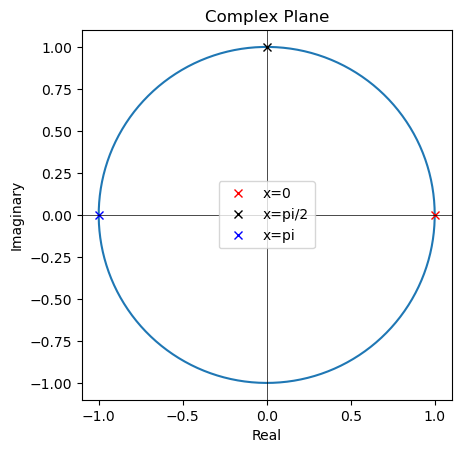

In [4]:
x = np.linspace(0,2*np.pi,300)
re = np.cos(x)
im = np.sin(x)
plt.plot(re,im)
plt.plot(np.cos(0),np.sin(0),'rx')
plt.plot(np.cos(np.pi/2),np.sin(np.pi/2),'kx')
plt.plot(np.cos(np.pi),np.sin(np.pi),'bx')
plt.axhline(y=0,color='black',linewidth=0.5)
plt.axvline(x=0,color='black',linewidth=0.5)
plt.title('Complex Plane')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.legend(['_','x=0','x=pi/2','x=pi'])
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.show()

## Discrete vs Continuous Signals
Now that we have gone over some basics in 1D waves and wave theory, we need discuss some key differences in audio. For one, what are discrete and continuous signals? Why bring up this topic and discuss this?

Continous Signals are values over all points in time within a given time interval which may be infinite. Examples of such are light waves which travel through space or sound waves that travel to your ears. These are also refered to as analog signals. We can think of the case of analog signals as if we could sample a signal infinetly and fully recover it. In the real world, we may not get this high of resolution of data. In reality, the analog signals that come to our recorder are converted to a digital signal that is a list of numbers or bits that encode the signal. We call these signals discrete signals, or values sampled at discrete points in time within a given time interval. Examples of such are wav audio files. The number of samples that can be encoded per second is refered to as the sampling rate (discussed previously). As a rule of thumb, the larger the sampling rate the larger the frequency you can recover. But why does this matter?

### Discrete signals in machine learning
Although it would be incredible to process continuous signals through machine learning, many times we use instruments and sampling to measure things such as sound traveling through different mediums (e.g. water or air). When we sample a signal we are losing information which may or may not be important. To understand this better we show the example below of a cosine wave that has more and less samples.

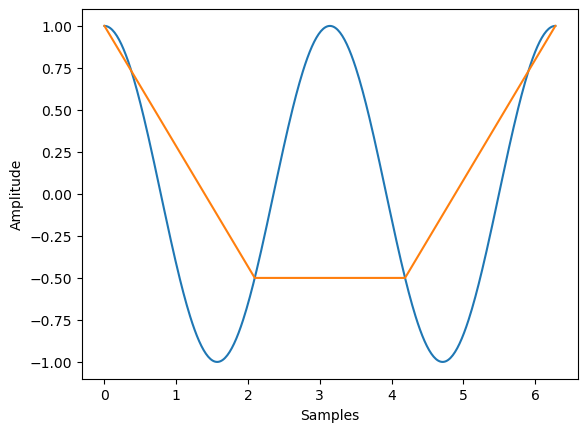

In [8]:
fs = 2
x = np.linspace(0, 2*np.pi, 401)
y = np.linspace(0,2*np.pi,4)

plt.plot(x,np.cos(fs*x))
plt.plot(y,np.cos(fs*y))
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

We can see from the above that by changing the amount we sample, we lose information about the signal. This will result in being unable to identify the cosine and changing it's frequency, this is known as aliasing. Aliasing is a measurement error that results in undersampling a signal. To improve our discrete signal, we need to take more samples, however, by taking more samples we need more space on our device or have a device that will sample at a higher rate. 

### Nyquist Theorem
What frequencies can we recover successfully with a given sampling rate you may be wondering. What's the minimum number of samples we need to recover the signal? This is where we can start breaking into some theory. In particular, we can turn to the Nyquist theorem. This states the following:
$$
    S > 2B
$$
where B is the bandwidth of the signal or the max frequency and $S$ is the sample rate. In Layman's terms, the highest frequency we can recover from a given S (typically due to instrument limations) is $\frac{1}{2}$. Inversely, we can think of this as, if you want to recover a particular frequency, the instrument needs to sample at two times the desired frequency. Let's take a look at this in action.

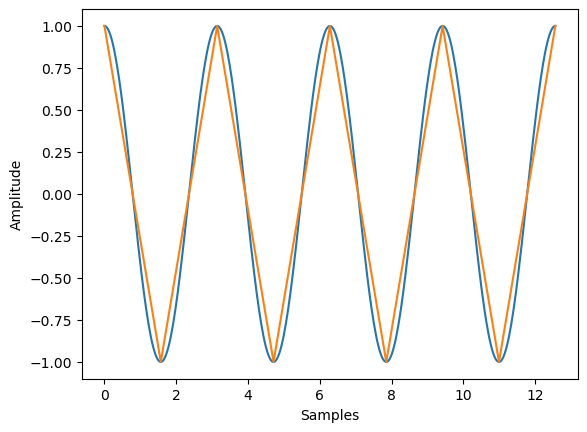

In [11]:
fs = 2 # sampling rate
L = 4 # length of signal
x = np.linspace(0, L*np.pi, 401)
y = np.linspace(0,L*np.pi,fs*L+1)

plt.plot(x,np.cos(fs*x))
plt.plot(y,np.cos(fs*y))
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

By sampling at twice the frequency of the signal, we can get a relatively rough but accurate outline of the signal. 

### Combining Waves
Now that we have looked at 1D waves components, trigonometric relationships, as well as sampling theorems, let's start looking at how these waves interact with each other. Let's consider two independent waves that are being transmitted simultaneously. Combinations of waves can be thought of as a linear summation of these waves. This causes the waves to interfer with each other causing either constructive and/or destructive interference. Constructive interference occurs when two waves are in phase with each other resulting in a larger amplitude. Conversely, destructive interference occurs when two waves that are out of phase with each other get combined resulting in a reduction of amplitudes. Let's take a look at this.

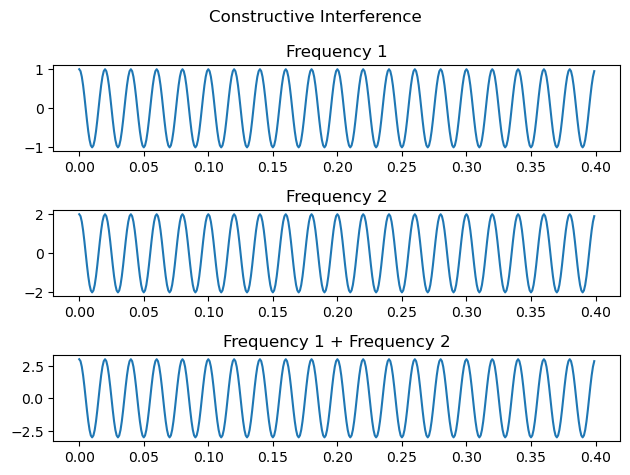

In [38]:
# Constructive interference example
N = 400
# sample spacing
T = 1.0 / 1000.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.real(np.exp(50.0 * 1.j * 2.0*np.pi*x)) #+ 0.5*np.exp(-80.0 * 1.j * 2.0*np.pi*x)
plt.subplot(3,1,1)
plt.plot(x,y)
plt.title('Frequency 1')

y1 = np.real(2*np.exp(50.0 * 1.j * 2.0*np.pi*x))
plt.subplot(3,1,2)
plt.plot(x,y1)
plt.title('Frequency 2')

y2 = y+y1
plt.subplot(3,1,3)
plt.plot(x,y2)
plt.title('Frequency 1 + Frequency 2')

plt.suptitle('Constructive Interference')
plt.tight_layout()

plt.show()

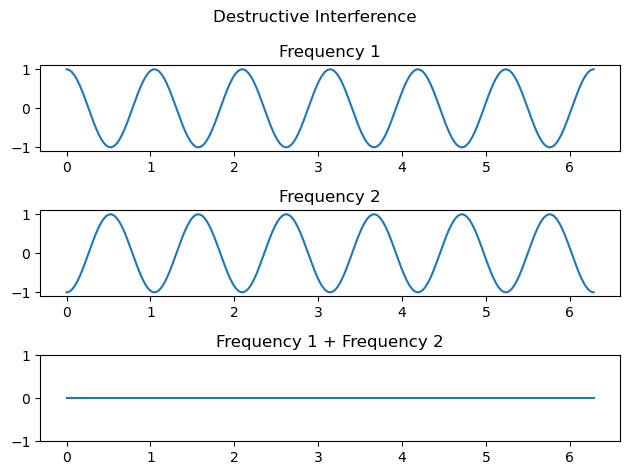

In [55]:
# Destructive interference example
x = np.linspace(0, 2*np.pi, 201)
y = np.real(np.cos(6*x)) 
plt.subplot(3,1,1)
plt.plot(x,y)
plt.title('Frequency 1')

y1 = np.real(np.cos(6*x-np.pi)) # pi is 180 degrees out of phase
plt.subplot(3,1,2)
plt.plot(x,y1)
plt.title('Frequency 2')

y2 = y+y1
plt.subplot(3,1,3)
plt.plot(x,y2)
plt.title('Frequency 1 + Frequency 2')
plt.ylim(-1,1)

plt.suptitle('Destructive Interference')
plt.tight_layout()

plt.show()

We can see that when the waves have the same frequency and are in phase, they result in a addition of the two amplitudes. Meanwhile, in the later case, where the two waves are out of phase, we can see the wave is fully destructive and we get no resulting amplitude. Now let's look at a case where we have varying frequencies.

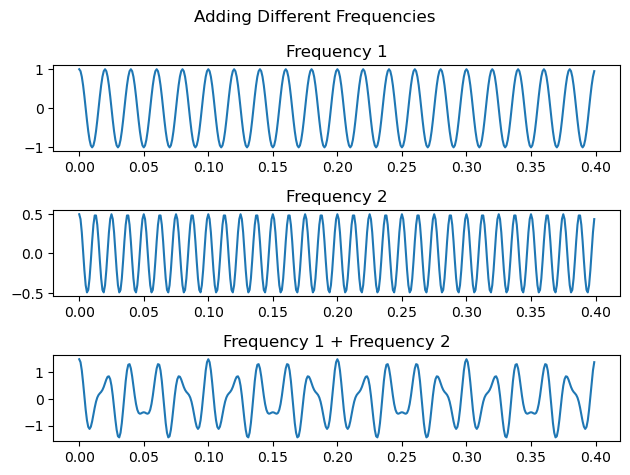

In [3]:
# Varying frequencies
N = 400
# sample spacing
T = 1.0 / 1000.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.real(np.exp(50.0 * 1.j * 2.0*np.pi*x)) #+ 0.5*np.exp(-80.0 * 1.j * 2.0*np.pi*x)
plt.subplot(3,1,1)
plt.plot(x,y)
plt.title('Frequency 1')

y1 = np.real(0.5*np.exp(-80.0 * 1.j * 2.0*np.pi*x))
plt.subplot(3,1,2)
plt.plot(x,y1)
plt.title('Frequency 2')

y2 = y+y1
plt.subplot(3,1,3)
plt.plot(x,y2)
plt.title('Frequency 1 + Frequency 2')

plt.suptitle('Adding Different Frequencies')

plt.tight_layout()
plt.show()

The two waves result is a strange looking signal but it is still possible to recover the linearly combined signals.

## Convolution or Correlation?
Before we discuss how to identify and recover the frequencies a given signal is made of, we first need to discuss a few mathematical operations. Two important operations for signal processing are a convolution and a correlation. The convolution combines two signals to create a third signal by integrating the amount of overalap between the two. Convolution operation reflects one of the signals about the y-axis and shifts the signal across the other and integrating. This is shown mathematically as:

$$
    (f*g)(t) = \int_{-\inf}^{inf}f(t)g(x-t)dt
$$
Essentially, this is looking at the sum of overlaps of one signal and all shifted versions of the other signal. The convolution is a powerful tool for statistics, probability, and (in the discussed application) acoustics. Below we show an example of a convolution of two signals.

In [2]:
from scipy import signal

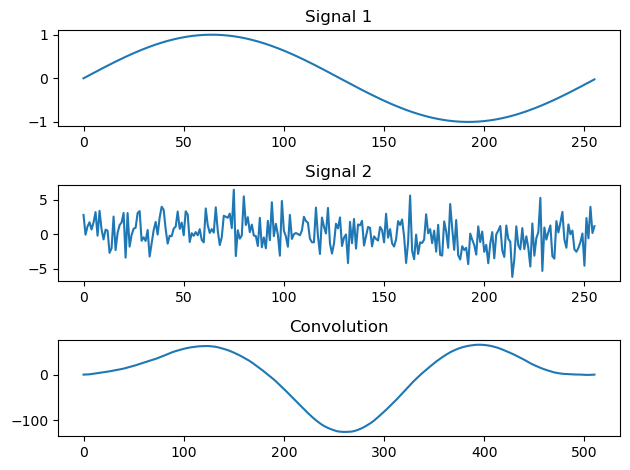

In [14]:
x = np.arange(256)/256
segment1 = np.sin(2*np.pi*x)
segment2 = segment1 + np.random.normal(0,2,len(segment1))
plt.subplot(3,1,1)
plt.plot(segment1)
plt.title('Signal 1')

plt.subplot(3,1,2)
plt.plot(segment2)
plt.title('Signal 2')

plt.subplot(3,1,3)
plt.plot(np.convolve(segment1,segment2))
plt.title('Convolution')

plt.tight_layout()

In addition to the convolution, there is another mathematical operation that is useful; Specifically, cross-correlation. Although quite similar to the convolution, a cross-correlation identifies a statistical relationship betwen two signals as a function of displacement. This is done by using the following:

$$
    (f*g)(t) = \int_{-\inf}^{inf}f(t)g(x-t)dx
$$
Similar to convoultion, one signal is shifter over another signal but neither signal is reflected. This approach is typically used over long time series to identify a known feature. This is demonstrated below.

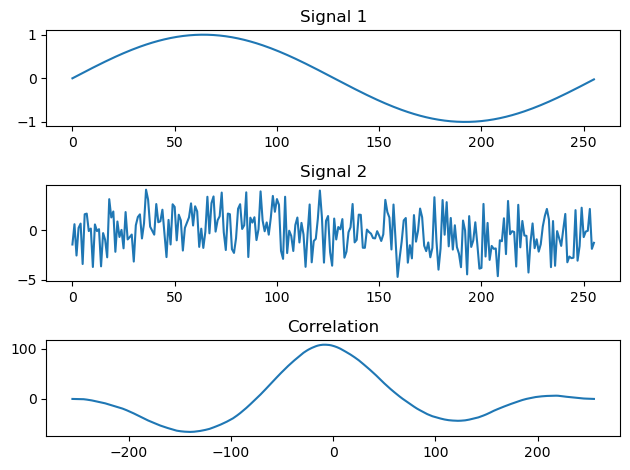

In [15]:
x = np.arange(256)/256
segment1 = np.sin(2*np.pi*x)
segment2 = segment1 + np.random.normal(0,2,len(segment1))
plt.subplot(3,1,1)
plt.plot(segment1)
plt.title('Signal 1')

plt.subplot(3,1,2)
plt.plot(segment2)
plt.title('Signal 2')

plt.subplot(3,1,3)
corr = signal.correlate(segment1,segment2)
lags = signal.correlation_lags(len(segment1), len(segment2))
plt.plot(lags,corr)
plt.title('Correlation')

plt.tight_layout()

## Fast Fourier Transforms
How do we untangle the signals that we see above and observe their varying frequency components? Thankfully there is a useful mathematical tool that allows us to capture the signal from the time domain in the frequency domain. This is done through the Fast Fourier Transform (FFT). In the context of sampling a signal, the FFT would be considered as a discrete Fourier transform (DFT); however, for this notebook, we will refer to the DFT as FFT. While we will not go into all the theory behind FFT, we will discuss FFT and it's use. Given a signal $x[n]$ of length N, the equation of the FFT is defined as:
$$
    X[k] = \sum^{N-1}_{n=0} = x[n]e^{\frac{-j2\pi kn}{N}}
$$
where k = 0,...,n-1 denotes the length of the FFT. This is the discrete form of the FFT. We can see that the signal is represented by the natural logarithm and it's various frequency components (as we have shown previously). When we apply the transform to a periodic sinusoid we get the following. 

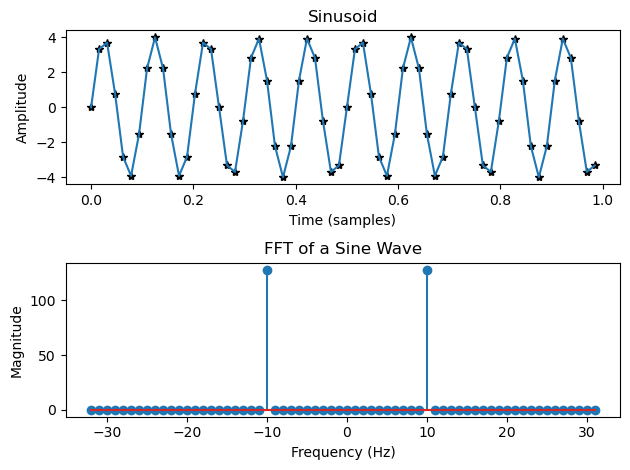

In [159]:
# Parameters:
fs = 64  # Sampling rate (samples per second)
T = 1  # Duration of the signal (seconds)
t = np.arange(0, T, 1/fs)  # Time vector
f = 10  # Frequency of the sine wave (Hz)
A = 4 # Amplitude
x = A*np.sin(2 * np.pi * f * t)

# Compute the FFT
X = np.fft.fft(x)
freqs = np.fft.fftfreq(len(x), 1/fs)

# Plot time data:
plt.subplot(2,1,1)
plt.plot(t,x,'*k')        
plt.plot(t,x) 
plt.title('Sinusoid')
plt.xlabel('Time (samples)') 
plt.ylabel('Amplitude')

# Plot the results
plt.subplot(2,1,2)
plt.stem(freqs, np.abs(X))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of a Sine Wave')

plt.tight_layout()
plt.show()

In the example above, we can see that the DFT pulled out the 10 Hz frequency sine wave from the signal. The two peaks in the magnitude plot located at the normalized frequencies is what we expect because:

$$
    DFT(\sin(\omega n)) = A\sum^{N-1}_{n=0}\frac{e^{j0n}}{2} = A\frac{N}{2}
$$
where N is the number of samples and A is the amplitude. 

### Inverse Fourier Transform
The benefit of using a Fourier transform is that we can also apply the inverse transform to get the time series signal. The Inverse or backward Fourier transform to go from the frequency representation to a time series is calculated as:

$$
    x[n] = \frac{1}{N}\sum^{N-1}_{k=0}X[k]e^{\frac{2\pi jmn}{N}}
$$

Applying the inverse DFT recovers the exact time series that we intially created.

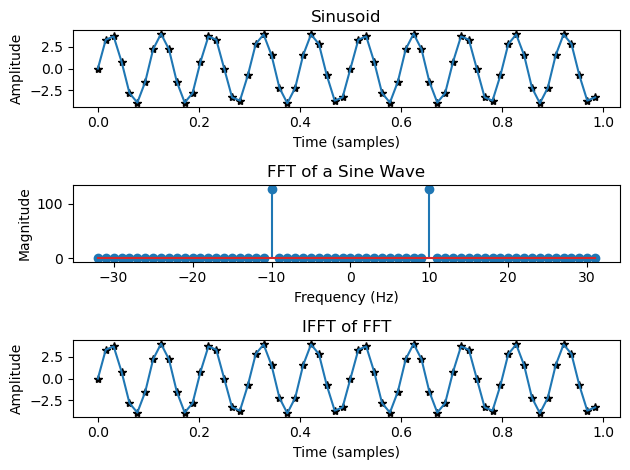

In [20]:
# Parameters:
fs = 64  # Sampling rate (samples per second)
T = 1  # Duration of the signal (seconds)
t = np.arange(0, T, 1/fs)  # Time vector
f = 10  # Frequency of the sine wave (Hz)
A = 4 # Amplitude
x = A*np.sin(2 * np.pi * f * t)

# Compute the FFT
X = np.fft.fft(x)
freqs = np.fft.fftfreq(len(x), 1/fs)

# Plot time data:
plt.subplot(3,1,1)
plt.plot(t,x,'*k')        
plt.plot(t,x) 
plt.title('Sinusoid')
plt.xlabel('Time (samples)') 
plt.ylabel('Amplitude')

# Plot the results
plt.subplot(3,1,2)
plt.stem(freqs, np.abs(X))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of a Sine Wave')

inversesignal = np.fft.ifft(X)
# Plot the results of Ifft
plt.subplot(3,1,3)
plt.plot(t,inversesignal,'*k')        
plt.plot(t,inversesignal) 
plt.title('IFFT of FFT')
plt.xlabel('Time (samples)') 
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

Now that we understand the basics of the FFT, let's dive into some complications with using FFTs. When we apply a FFT to a signal that is not fully periodic in the sampled interval, we can get some spectral leakage. Spectral leakage causes energy associated with a frequency to leak over the entire frequency spectrum. Below, we demonstrate what spectral leakage looks like. 

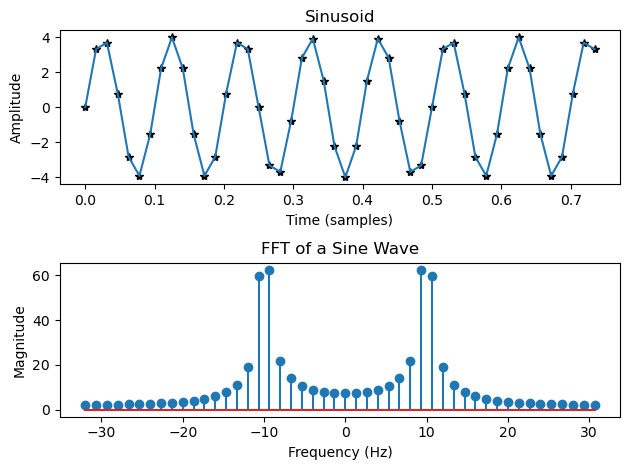

In [14]:
fs = 64  # Sampling rate (samples per second)
T = .75  # Duration of the signal (seconds)
t = np.arange(0, T, 1/fs)  # Time vector
f = 10  # Frequency of the sine wave (Hz)
A = 4 # Amplitude
x = A*np.sin(2 * np.pi * f * t)

# Compute the FFT
X = np.fft.fft(x)
freqs = np.fft.fftfreq(len(x), 1/fs)

# Plot time data:
plt.subplot(2,1,1)
plt.plot(t,x,'*k')        
plt.plot(t,x) 
plt.title('Sinusoid')
plt.xlabel('Time (samples)') 
plt.ylabel('Amplitude')

# Plot the results
plt.subplot(2,1,2)
plt.stem(freqs, np.abs(X))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of a Sine Wave')

plt.tight_layout()
plt.show()

Above we can see that energy of the 10Hz signal has leaked into other frequencies and is spread out throughout the spectrum. This leakage can create side lobes which are peaks in the frequency domain that are generally less than the main lobes but are spread out across the spectra. Unfortunately, this cannot be avoided when applying the FFT to a discrete signal. However, there are ways to work around this issue. In particular, we can apply spectral windowing. This approach applies tapering at ends of the segment (to the left and right of the signal) to ensure we are looking at the transient events that are happening within that window. In practice, the signal is first windowed and then the data is multiplied by the window function values. This helps reduce spectral leakage that may occur through the Fourier trasnform. For brevity, we will look at one spectral windowing approach, the Blackman window. 

The Blackman window was designed to have minimal leakeage as possible and reduce the sidelobes but does not null them out. This is calculated as:
$$
    w = a_0 - a_1 \cos(\frac{2\pi n}{N}) + a_2\cos(\frac{4\pi n}{N})
$$
where $a_n$ is a constant that tapers the effect of sidelobes and spectral leakage. For some details of this, please look at the SciPy implementation of the Blackman window [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.blackman.html). The equation for FFT then changes to the following:
$$
    X[k] = \sum^{N-1}_{n=0} = x[n]w[n]e^{\frac{-j2\pi kn}{N}}
$$
Applying the windowing function to the signal using convolution in time (or multiplication in frequency domain), we get the resulting signal.

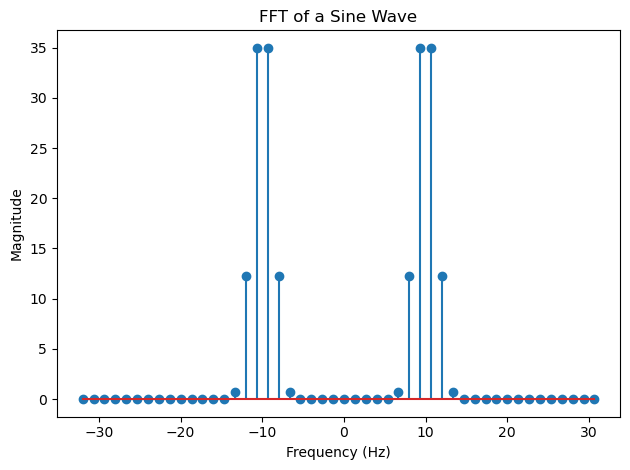

In [17]:
window = signal.windows.blackman(len(x))

# Compute the FFT
X = np.fft.fft(x*window)
freqs = np.fft.fftfreq(len(X), 1/fs)

plt.stem(freqs, np.abs(X))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of a Sine Wave')

plt.tight_layout()
plt.show()

We can see that the leakage of energy has been reduced from the 10Hz sinusodial signal. Although we don't discuss all of the windowing function we invite the reader to look at other windowing functions such as the Boxcar, Kaiser, or Bartlett windown found [here](https://docs.scipy.org/doc/scipy/reference/signal.windows.html#module-scipy.signal.windows).

## Spectrogram
Because sounds are not always continuous in time, the FFT may not always pick up certain frequencies or isolate sounds in time. To overcome this, we can take segments of our signal and apply the FFT to each segment. Applying this approach, we can create a spectrogram. Spectrogram contains amplitude, frequency, and time information which is useful for transient sounds. An example of this is seen below for a given trumpet sound

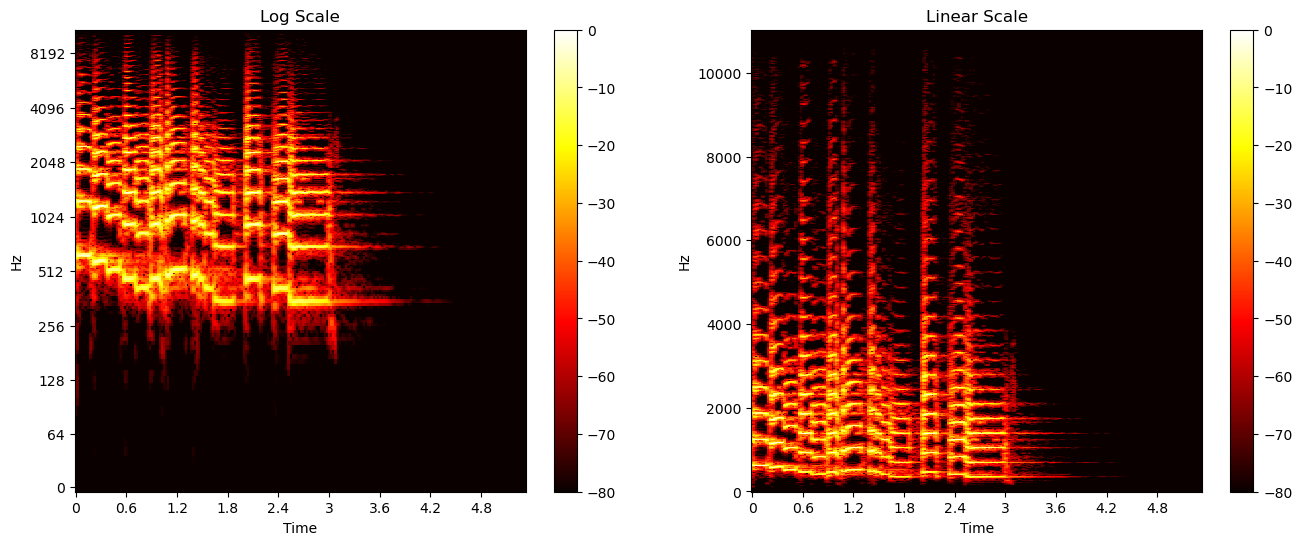

In [16]:
filename = librosa.ex('trumpet')
y, sr = librosa.load(filename)

# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(y, n_fft = n_fft, hop_length = hop_length))

# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB = librosa.amplitude_to_db(D, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
plt.subplot(1,2,1)
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'hot')
plt.colorbar();
plt.title('Log Scale')

plt.subplot(1,2,2)
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'linear',
                        cmap = 'hot')
plt.colorbar();
plt.title('Linear Scale')

plt.show()

As discussed previously, the sound is split in time with some overlap of the segments and resulting FFTs of each segment are stitched together. In this way we can see the change of frequencies over time and some dominant frequencies. The above example shows two spectras, one with a log scale applied to the y-axis and the other with a linear scale. In cases where lower frequencies are of interest, it may be easier to identify frequencies using a log scale which a linear scale may be more useful for identifying sounds at higher frequencies. 

# Additional Signal Processing Techniques

## Smoothing
Smoothing involves modifying data points in a signal to remove noisy samples. This helps to identify trends and improve the quality of your signal. There are several different smoothing techniques that can be used (including the ones found [here](https://docs.scipy.org/doc/scipy/reference/signal.html#filtering)). For brevity, we will demonstrate one of the smoothing approaches, the moving average.

### Moving Average Smoothing
The moving average eliminates noise by taking a window (e.g. 10 discrete points) of a given signal (x), finds the average over these points, and uses the average value as the value for that point. The smoothed signal (y) is calculated as:

$$
    y[t] = \frac{x_{t},x_{t+1},...,x_{t+L-1}}{L}
$$
where t is index in time and L is the length of the window. This approach is seen below where we add some noise to a given sinusodial signal and try to filter out the noise.

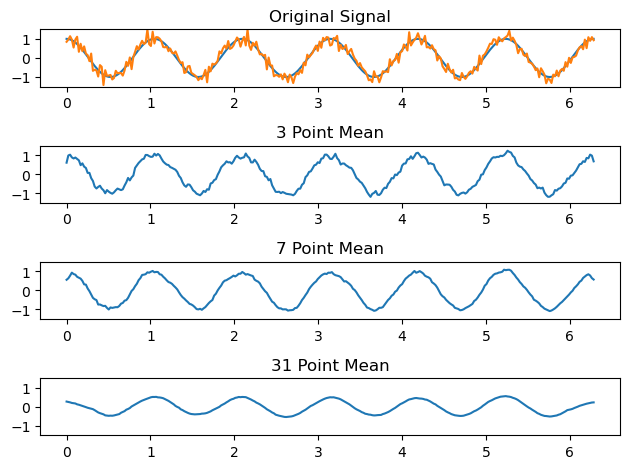

In [60]:
x = np.linspace(0, 2*np.pi, 301)
signal = np.cos(6*x)
noisysignal = signal + np.random.normal(0,.2,301)

# moving mean of 3 points
N = 3
newsignal3point = np.convolve(noisysignal, np.ones(N)/N, mode='same')
# moving mean of 7 points
N = 7
newsignal7point = np.convolve(noisysignal, np.ones(N)/N, mode='same')
# moving mean of 31 points
N = 31
newsignal31point = np.convolve(noisysignal, np.ones(N)/N, mode='same')

plt.subplot(4,1,1)
plt.plot(x,signal)
plt.plot(x,noisysignal)
plt.title('Original Signal')
plt.ylim(-1.5,1.5)

plt.subplot(4,1,2)
plt.plot(x,newsignal3point)
plt.title('3 Point Mean')
plt.ylim(-1.5,1.5)

plt.subplot(4,1,3)
plt.plot(x,newsignal7point)
plt.title('7 Point Mean')
plt.ylim(-1.5,1.5)

plt.subplot(4,1,4)
plt.plot(x,newsignal31point)
plt.title('31 Point Mean')
plt.ylim(-1.5,1.5)

plt.tight_layout()
plt.show()

One thing to notice about this approach is that when we apply this approach with a smaller window, some of the noise is still present in the signal. Conversely, when we apply a larger window, the signal is mostly smooth. The amplitudes of the smooth signal begins to decrease with increasing windows and we potentially remove some of the higher frequency components in our signal (if any were present).  

## High pass, low pass, and band pass filters
One last approach we will discuss in this notebook is the use of pass filtering. In particular, there are three different techniques that can be applied, a high, low, or band pass filter. These filters reference the frequencies that are kept or rejected from a signal. A low pass filter passes low frequencies and rejects high frequencies while a high pass filter passes high frequencies and rejects low frequencies. The band pass filter passes frequencies between a given band (e.g. between 10 and 1000 Hz). There are a number of different filters that have been developed over the years (please check out [here](https://docs.scipy.org/doc/scipy/reference/signal.html#filter-design) for more information of different filters), but we will focus on the Butterworth filter in this notebook.

The Butterworth filter is designed to have a flat response in the pass band. For a given signal in the frequency domain, we can define the transfer function (H) as:

$$
    H(\omega) = \frac{1}{\sqrt{1+(\frac{\omega}{\omega_c})^{2n}}}
$$
where $\omega$ is the angular frequency in radians per second ($f2\pi = \omega$), $\omega_c$ is the cutoff frequency, and n is the order of the filter. 

In [1]:
# import package
from scipy import signal

### Low Pass Filter

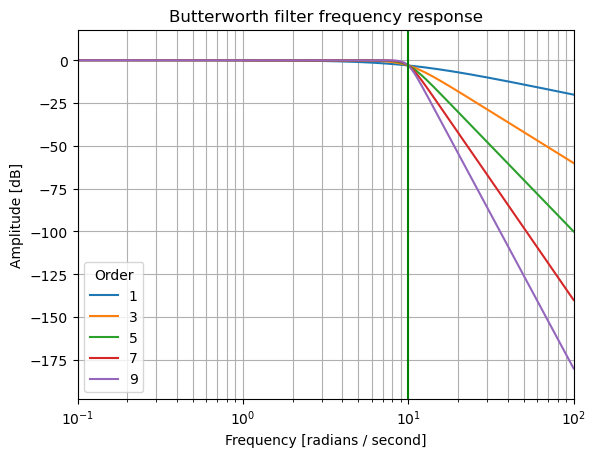

In [44]:
for i in range(1,10,2):
    b, a = signal.butter(i, 10, 'low', analog=True)
    w, h = signal.freqs(b, a)
    plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(10, color='green') # cutoff frequency
plt.legend(['1','3','5','7','9'],title='Order')
plt.show()

The above plot shows the Butterworth filter frequency response with a cutoff at 10Hz. At the cutoff frequency, the amplitude starts to decrease at a significant rate (depending on the order used). This dropoff reduces the higher frequency components of the signal which is shown in the example below.

### Low Pass Example

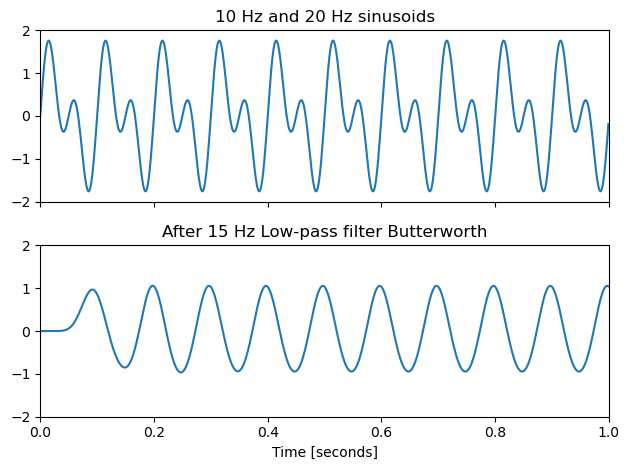

In [72]:
t = np.linspace(0, 1, 1000, False)  # 1 second
sig = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, sig)
ax1.set_title('10 Hz and 20 Hz sinusoids')
ax1.axis([0, 1, -2, 2])

sos = signal.butter(10, 15, 'lp', fs=1000, output='sos')
filtered = signal.sosfilt(sos, sig)
ax2.plot(t, filtered)
ax2.set_title('After 15 Hz Low-pass filter Butterworth')
ax2.axis([0, 1, -2, 2])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

We can see that the lower frequency signal is preserved in the above example. 

### High Pass Filter
To adjust the above equation to make it into a high pass filter we can do the following:
$$
    H(\omega) = \frac{1}{\sqrt{1+(\frac{\omega}{\omega_c})^{-2n}}}
$$


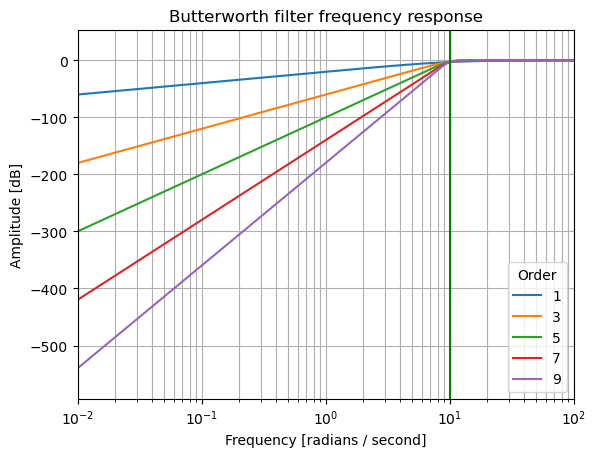

In [74]:
for i in range(1,10,2):
    b, a = signal.butter(i, 10, 'highpass', analog=True)
    w, h = signal.freqs(b, a)
    plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(10, color='green') # cutoff frequency
plt.legend(['1','3','5','7','9'],title='Order')
plt.show()

Similar to the low pass filter, the Butterworth filter reduces the frequency response of the signal below the cutoff frequency while maintaining the the higher frequency components. This is shown below in the high pass example.

### High Pass Example

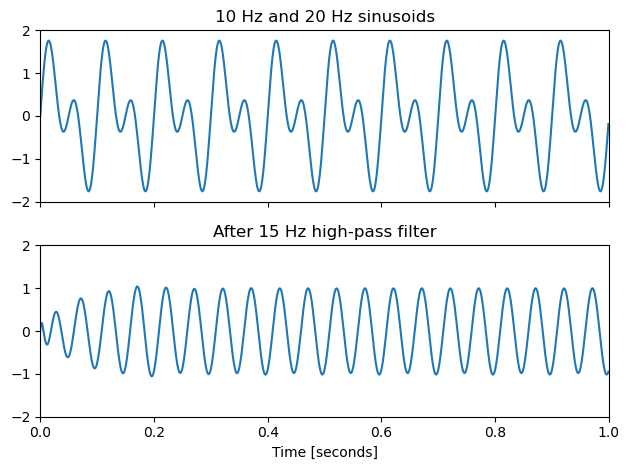

In [76]:
t = np.linspace(0, 1, 1000, False)  # 1 second
sig = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, sig)
ax1.set_title('10 Hz and 20 Hz sinusoids')
ax1.axis([0, 1, -2, 2])

sos = signal.butter(10, 15, 'hp', fs=1000, output='sos')
filtered = signal.sosfilt(sos, sig)
ax2.plot(t, filtered)
ax2.set_title('After 15 Hz high-pass filter')
ax2.axis([0, 1, -2, 2])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

We can see that the filter now preserves the higher frequency component of the signal while removing the lower frequencies. using these same ideas, we can apply the band pass filter which is shown in the next example.

### Band Pass Filter

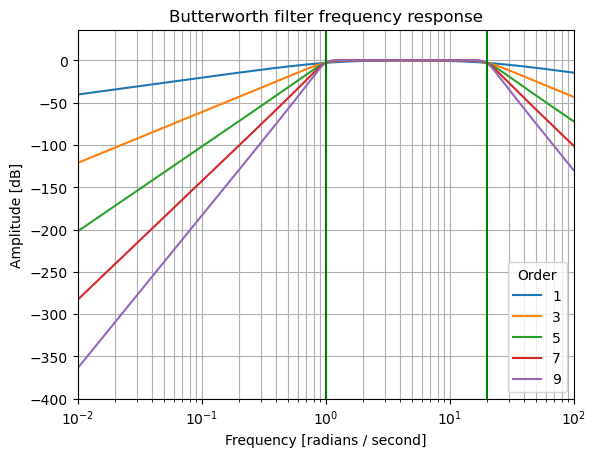

In [7]:
for i in range(1,10,2):
    b, a = signal.butter(i, [1,20], 'bandpass', analog=True)
    w, h = signal.freqs(b, a)
    plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(1, color='green') # cutoff frequency
plt.axvline(20, color='green') # cutoff frequency
plt.legend(['1','3','5','7','9'],title='Order')
plt.show()

### Example Bandpass Filter

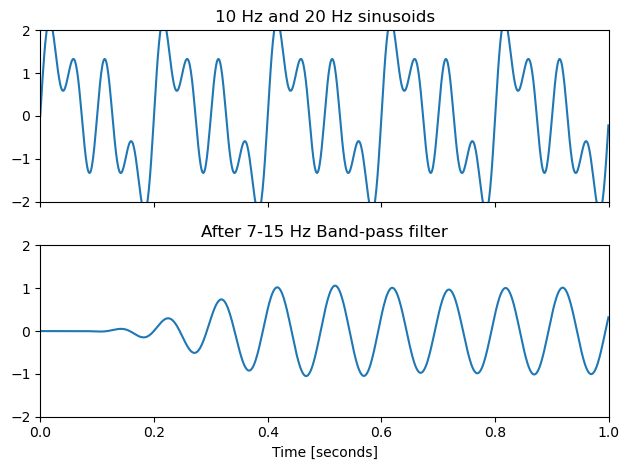

In [87]:
t = np.linspace(0, 1, 1000, False)  # 1 second
sig = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t) + np.sin(2*np.pi*5*t)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, sig)
ax1.set_title('10 Hz and 20 Hz sinusoids')
ax1.axis([0, 1, -2, 2])

sos = signal.butter(10, [7,15], 'bp', fs=1000, output='sos')
filtered = signal.sosfilt(sos, sig)
ax2.plot(t, filtered)
ax2.set_title('After 7-15 Hz Band-pass filter')
ax2.axis([0, 1, -2, 2])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

Removing the higher and lower frequency parts, the reconstructed signal keeps the signals that are within the bands of cutoff frequencies and reults in the signal above. 

# Citations 
1) Alan V. Oppenheim and Ronald W. Schafer. 2009. Discrete-Time Signal Processing (3rd. ed.). Prentice Hall Press, USA.
2) Blackman, R.B. and Tukey, J.W., (1958) The measurement of power spectra, Dover Publications, New York.
3) Harris, Fredric J. (Jan 1978). “On the use of Windows for Harmonic Analysis with the Discrete Fourier Transform”. Proceedings of the IEEE 66 (1): 51-83. DOI:10.1109/PROC.1978.10837.
4) Pauli Virtanen, Ralf Gommers, Travis E. Oliphant, Matt Haberland, Tyler Reddy, David Cournapeau, Evgeni Burovski, Pearu Peterson, Warren Weckesser, Jonathan Bright, Stéfan J. van der Walt, Matthew Brett, Joshua Wilson, K. Jarrod Millman, Nikolay Mayorov, Andrew R. J. Nelson, Eric Jones, Robert Kern, Eric Larson, CJ Carey, İlhan Polat, Yu Feng, Eric W. Moore, Jake VanderPlas, Denis Laxalde, Josef Perktold, Robert Cimrman, Ian Henriksen, E.A. Quintero, Charles R Harris, Anne M. Archibald, Antônio H. Ribeiro, Fabian Pedregosa, Paul van Mulbregt, and SciPy 1.0 Contributors. (2020) SciPy 1.0: Fundamental Algorithms for Scientific Computing in Python. Nature Methods, 17(3), 261-272. DOI: 10.1038/s41592-019-0686-2.
5) Proakis, J. G., & Manolakis, D. G. (1996). Digital signal processing (3rd ed.): principles, algorithms, and applications. USA: Prentice-Hall, Inc.